In [1]:
import sys
from pathlib import Path
from os.path import dirname, realpath, abspath
script_dir = Path(abspath(''))
module_dir = str(script_dir.parent)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)

import num_gan as ng
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\Users\pinak\Documents\GitHub\GAN


In [2]:
data = np.genfromtxt('..\data\l63_attractor_10000.csv', delimiter=',')
dataset = tf.data.Dataset.from_tensor_slices(data).batch(1000)
gan = ng.NumGAN(16, 3, 3, 2, name='attractor_sampler')
gan.load()

In [12]:
data = np.genfromtxt('..\data\l63_attractor_10000.csv', delimiter=',', dtype=np.float32)
dataset = tf.data.Dataset.from_tensor_slices(data).batch(1000)
mask = np.array([1, 0, 1], dtype=np.float32)
com = ng.NumCompleter(gan, mask, lam=0.1)
com.load()
com.train(data[:1000], 100000)

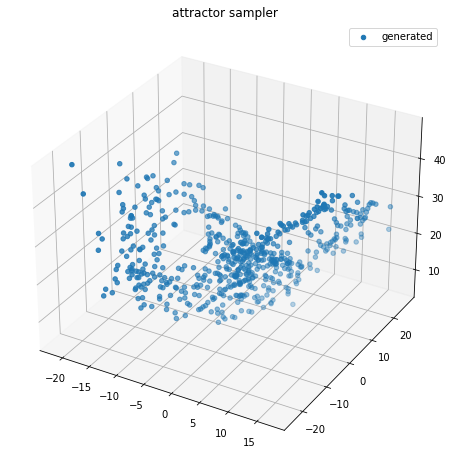

In [4]:
n = 600
noise = tf.random.normal([n, 2])
gen = gan.generator(noise, training=False)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gen[:, 0], gen[:, 1], gen[:, 2], label='generated')
#ax.scatter(data[0:n, 0], data[0:n, 1], data[0:n, 2], label='true')
ax.set_title('attractor sampler')
plt.legend()
plt.show()

In [10]:
incmp = tf.math.multiply(mask, data[:1000])
cmp = com.complete(incmp)
data[:1000], cmp

(array([[-12.074984  ,  -9.77053   ,  34.018635  ],
        [ -7.9926376 ,  -3.4290254 ,  31.581297  ],
        [ -4.612502  ,  -2.633371  ,  25.621176  ],
        ...,
        [ -9.799786  ,  -0.6631128 ,  37.08014   ],
        [ -2.51214   ,   2.2147365 ,  27.760042  ],
        [  0.31851184,   1.8559695 ,  21.119528  ]], dtype=float32),
 <tf.Tensor: shape=(1000, 3), dtype=float32, numpy=
 array([[-12.074984  ,  -9.471314  ,  34.018635  ],
        [ -7.9926376 ,  15.829135  ,  31.581297  ],
        [ -4.612502  ,  -1.8947785 ,  25.621176  ],
        ...,
        [ -9.799786  ,  -0.94999516,  37.08014   ],
        [ -2.51214   ,   0.36496827,  27.760042  ],
        [  0.31851184,   1.8737785 ,  21.119528  ]], dtype=float32)>)

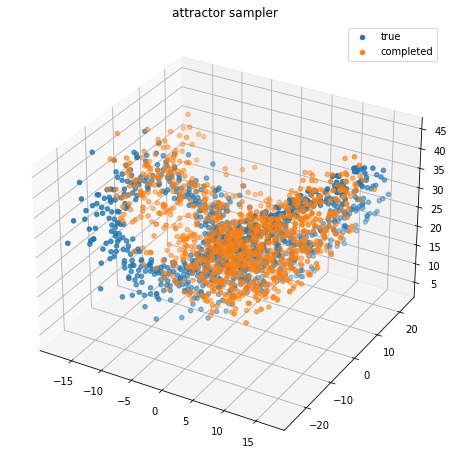

In [6]:
n = 1000
pcmp = tf.math.multiply(mask, cmp)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(pcmp[0:n, 0], pcmp[0:n, 1], pcmp[0:n, 2], label='incomplete')
ax.scatter(data[0:n, 0], data[0:n, 1], data[0:n, 2], label='true')
ax.scatter(cmp[0:n, 0], cmp[0:n, 1], cmp[0:n, 2], label='completed')
ax.set_title('attractor sampler')
plt.legend()
plt.show()

In [7]:
tf.reduce_mean(tf.keras.losses.mean_absolute_error(data[:1000], cmp))

<tf.Tensor: shape=(), dtype=float32, numpy=2.816132>

In [8]:
pcmp

<tf.Tensor: shape=(1000, 3), dtype=float32, numpy=
array([[-12.074984  ,  -0.        ,  34.018635  ],
       [ -7.9926376 ,   0.        ,  31.581297  ],
       [ -4.612502  ,   0.        ,  25.621176  ],
       ...,
       [ -9.799786  ,  -0.        ,  37.08014   ],
       [ -2.51214   ,   0.        ,  27.760042  ],
       [  0.31851184,   0.        ,  21.119528  ]], dtype=float32)>